In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

In [332]:
data=pd.read_csv('/content/train_loan_preprocess.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [333]:
data.size

7982

In [334]:
data.shape

(614, 13)

In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [336]:
data.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [337]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [338]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [339]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [340]:
categorical=['Gender','Married','Dependents','Self_Employed']
numerical=['LoanAmount','Loan_Amount_Term']


In [341]:
for c in categorical:
  mode_val=data[c].mode()[0]
  data[c].fillna(mode_val,inplace=True)

In [342]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

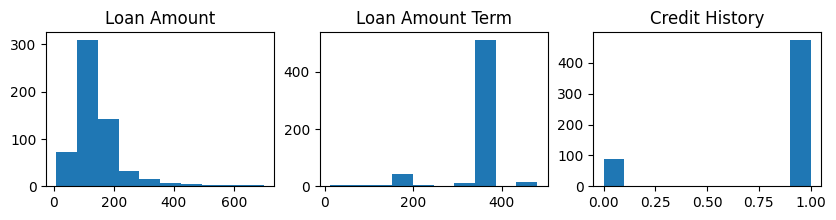

In [343]:
fig,ax=plt.subplots(1,3,figsize=(10,2))

ax[0].hist(data['LoanAmount'])
ax[0].set_title('Loan Amount')

ax[1].hist(data['Loan_Amount_Term'])
ax[1].set_title('Loan Amount Term')

ax[2].hist(data['Credit_History'])
ax[2].set_title('Credit History')

plt.show()

In [344]:
for n in numerical:
  mean_val=data[n].mean()
  data[n].fillna(mean_val,inplace=True)

In [345]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [346]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [347]:
replacevals = {'Credit_History':0}
data.fillna(value=replacevals,inplace=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [348]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [349]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


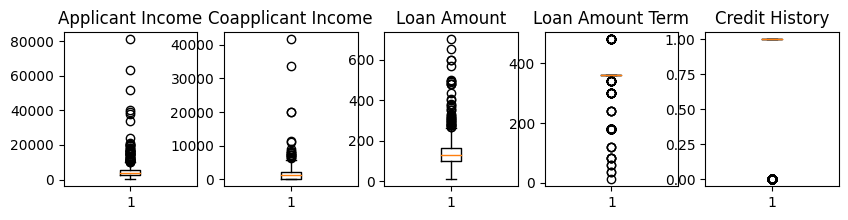

In [350]:
fig,ax=plt.subplots(1,5,figsize=(10,2))

ax[0].boxplot(data['ApplicantIncome'])
ax[0].set_title('Applicant Income')

ax[1].boxplot(data['CoapplicantIncome'])
ax[1].set_title('Coapplicant Income')

ax[2].boxplot(data['LoanAmount'])
ax[2].set_title('Loan Amount')

ax[3].boxplot(data['Loan_Amount_Term'])
ax[3].set_title('Loan Amount Term')

ax[4].boxplot(data['Credit_History'])
ax[4].set_title('Credit History')

plt.show()

In [351]:
q1 = np.percentile(data['ApplicantIncome'],25, interpolation='midpoint')
q2 = np.percentile(data['ApplicantIncome'],50, interpolation='midpoint')
q3 = np.percentile(data['ApplicantIncome'],75, interpolation='midpoint')
IQR = q3 - q1
print(q1,q2,q3)
print(IQR)

2879.0 3812.5 5790.0
2911.0


In [352]:
min = q1 - 1.5 * IQR
max = q3 + 1.5 * IQR
print(min,max)

-1487.5 10156.5


In [353]:
outliers=[]
for x in data['ApplicantIncome']:
    if x < min or x > max:
        outliers.append(x)
outliers

[12841,
 12500,
 11500,
 10750,
 13650,
 11417,
 14583,
 10408,
 23803,
 10513,
 20166,
 14999,
 11757,
 14866,
 39999,
 51763,
 33846,
 39147,
 12000,
 11000,
 16250,
 14683,
 11146,
 14583,
 20667,
 20233,
 15000,
 63337,
 19730,
 15759,
 81000,
 14880,
 12876,
 10416,
 37719,
 16692,
 16525,
 16667,
 10833,
 18333,
 17263,
 20833,
 13262,
 17500,
 11250,
 18165,
 19484,
 16666,
 16120,
 12000]

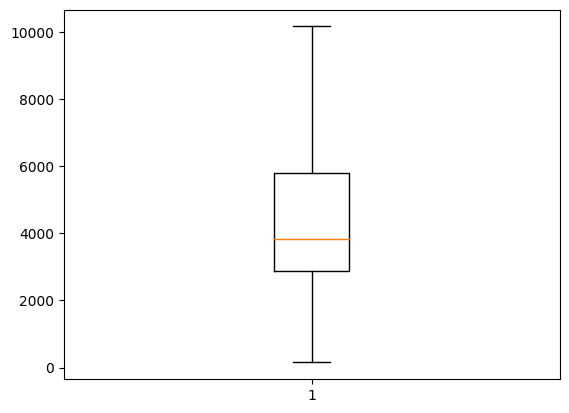

In [354]:
data['ApplicantIncome'] = data['ApplicantIncome'].clip(min,max)
plt.boxplot(data['ApplicantIncome'])
plt.show()

In [355]:
q1 = np.percentile(data['CoapplicantIncome'],25, interpolation='midpoint')
q2 = np.percentile(data['CoapplicantIncome'],50, interpolation='midpoint')
q3 = np.percentile(data['CoapplicantIncome'],75, interpolation='midpoint')
IQR = q3 - q1
print(q1,q2,q3)
print(IQR)

0.0 1188.5 2292.5
2292.5


In [356]:
min = q1 - 1.5 * IQR
max = q3 + 1.5 * IQR

print(min,max)

-3438.75 5731.25


In [357]:
outliers = []
for x in data['CoapplicantIncome']:
    if x < min or x > max:
        outliers.append(x)
outliers

[10968.0,
 8106.0,
 7210.0,
 8980.0,
 7750.0,
 11300.0,
 7250.0,
 7101.0,
 6250.0,
 7873.0,
 20000.0,
 20000.0,
 8333.0,
 6667.0,
 6666.0,
 7166.0,
 33837.0,
 41667.0]

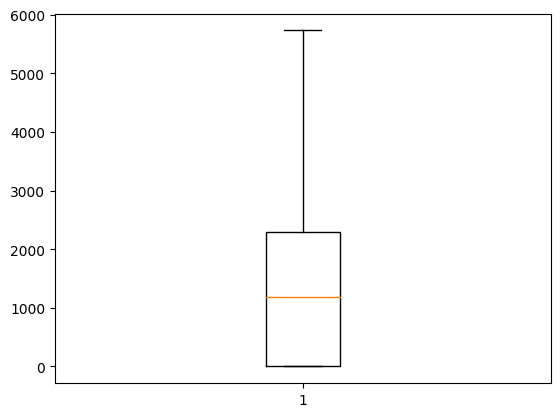

In [358]:
data['CoapplicantIncome'] = data['CoapplicantIncome'].clip(min,max)
plt.boxplot(data['CoapplicantIncome'])
plt.show()

In [359]:
Q1 = np.percentile(data['LoanAmount'],25, interpolation='midpoint')
Q2 = np.percentile(data['LoanAmount'],50, interpolation='midpoint')
Q3 = np.percentile(data['LoanAmount'],75, interpolation='midpoint')
IQR = Q3 - Q1
print(Q1,Q2,Q3)
print(IQR)

100.5 129.0 164.5
64.0


In [360]:
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
print(min,max)

4.5 260.5


In [361]:
outliers= []
for x in data['LoanAmount']:
    if x < min or x > max:
        outliers.append(x)
outliers

[267.0,
 349.0,
 315.0,
 320.0,
 286.0,
 312.0,
 265.0,
 370.0,
 650.0,
 290.0,
 600.0,
 275.0,
 700.0,
 495.0,
 280.0,
 279.0,
 304.0,
 330.0,
 436.0,
 480.0,
 300.0,
 376.0,
 490.0,
 308.0,
 570.0,
 380.0,
 296.0,
 275.0,
 360.0,
 405.0,
 500.0,
 480.0,
 311.0,
 480.0,
 400.0,
 324.0,
 600.0,
 275.0,
 292.0,
 350.0,
 496.0]

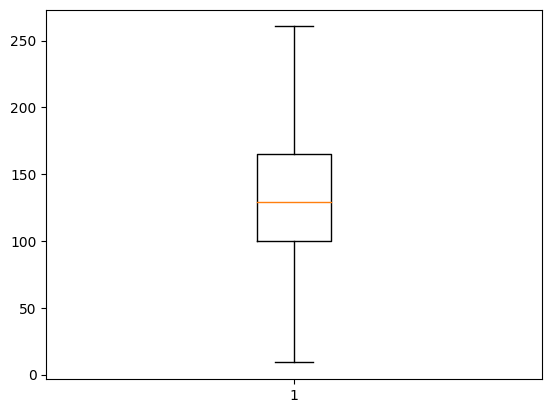

In [362]:
data['LoanAmount'] = data['LoanAmount'].clip(min,max)
plt.boxplot(data['LoanAmount'])


plt.show()

In [363]:
Q1 = np.percentile(data['Loan_Amount_Term'],25, interpolation='midpoint')
Q2 = np.percentile(data['Loan_Amount_Term'],50, interpolation='midpoint')
Q3 = np.percentile(data['Loan_Amount_Term'],75, interpolation='midpoint')
IQR = Q3 - Q1
print(Q1,Q2,Q3)
print(IQR)

360.0 360.0 360.0
0.0


In [364]:
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
print(min,max)

360.0 360.0


In [365]:
outliers= []
for x in data['Loan_Amount_Term']:
    if x < min or x > max:
        outliers.append(x)
outliers

[120.0,
 240.0,
 342.0,
 342.0,
 342.0,
 342.0,
 180.0,
 180.0,
 60.0,
 300.0,
 342.0,
 480.0,
 300.0,
 240.0,
 180.0,
 120.0,
 180.0,
 180.0,
 480.0,
 342.0,
 180.0,
 180.0,
 480.0,
 120.0,
 180.0,
 180.0,
 180.0,
 180.0,
 342.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 300.0,
 180.0,
 342.0,
 180.0,
 342.0,
 480.0,
 180.0,
 342.0,
 180.0,
 60.0,
 180.0,
 180.0,
 480.0,
 180.0,
 36.0,
 180.0,
 300.0,
 480.0,
 480.0,
 84.0,
 180.0,
 180.0,
 180.0,
 342.0,
 180.0,
 480.0,
 300.0,
 480.0,
 342.0,
 300.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 180.0,
 300.0,
 300.0,
 342.0,
 342.0,
 180.0,
 240.0,
 300.0,
 300.0,
 180.0,
 180.0,
 180.0,
 180.0,
 300.0,
 84.0,
 12.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 180.0,
 36.0,
 180.0,
 480.0,
 84.0,
 84.0,
 180.0,
 240.0,
 180.0,
 180.0,
 180.0,
 180.0]

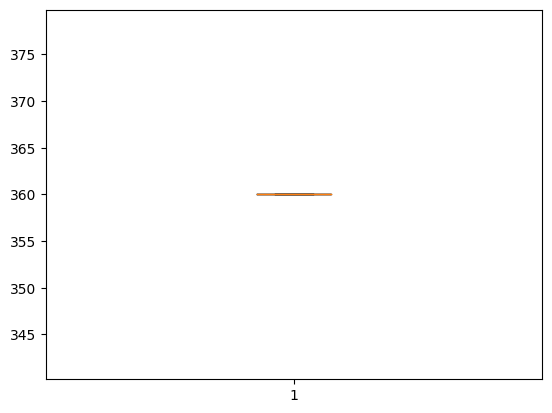

In [366]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].clip(min,max)
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

In [367]:
Q1 = np.percentile(data['Credit_History'],25, interpolation='midpoint')
Q2 = np.percentile(data['Credit_History'],50, interpolation='midpoint')
Q3 = np.percentile(data['Credit_History'],75, interpolation='midpoint')
IQR = Q3 - Q1
print(Q1,Q2,Q3)
print(IQR)

1.0 1.0 1.0
0.0


In [368]:
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
print(min,max)

1.0 1.0


In [369]:
outliers= []
for x in data['Credit_History']:
    if x < min or x > max:
        outliers.append(x)
outliers

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

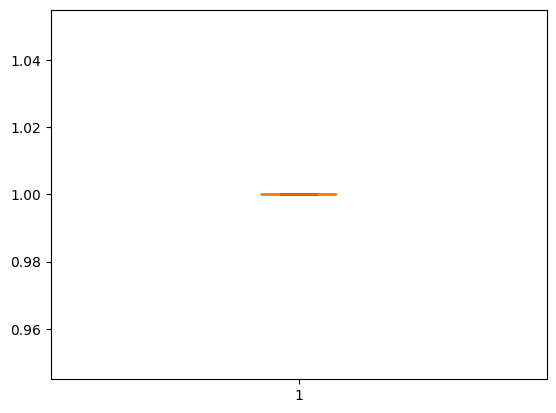

In [370]:
data['Credit_History'] = data['Credit_History'].clip(min,max)
plt.boxplot(data['Credit_History'])
plt.show()

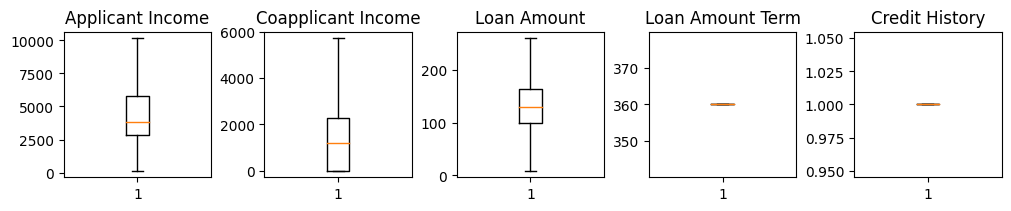

In [371]:
fig,ax=plt.subplots(1,5,figsize=(10,2),constrained_layout=True)

ax[0].boxplot(data['ApplicantIncome'])
ax[0].set_title('Applicant Income')

ax[1].boxplot(data['CoapplicantIncome'])
ax[1].set_title('Coapplicant Income')

ax[2].boxplot(data['LoanAmount'])
ax[2].set_title('Loan Amount')

ax[3].boxplot(data['Loan_Amount_Term'])
ax[3].set_title('Loan Amount Term')

ax[4].boxplot(data['Credit_History'])
ax[4].set_title('Credit History')

plt.show()

In [372]:
data
data1=data.copy()

In [373]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


In [374]:
label_enc = LabelEncoder()
data['Loanid_enc'] = label_enc.fit_transform(data['Loan_ID'])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loanid_enc
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,2
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,3
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y,609
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,360.0,1.0,Rural,Y,610
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y,611
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y,612


In [375]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [376]:
onehotencoder = OneHotEncoder(sparse=False)
onehotencoded = onehotencoder.fit_transform(data[['Property_Area']])
onehotencoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [377]:
one_hot_data = pd.DataFrame(onehotencoded,columns=onehotencoder.get_feature_names_out(['Property_Area']))
data = pd.concat([data,one_hot_data], axis=1)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loanid_enc,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,0,0.0,0.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,1,1.0,0.0,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,2,0.0,0.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,3,0.0,0.0,1.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,4,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y,609,1.0,0.0,0.0
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,360.0,1.0,Rural,Y,610,1.0,0.0,0.0
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y,611,0.0,0.0,1.0
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y,612,0.0,0.0,1.0


In [378]:
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


In [379]:
data1encoded = pd.get_dummies(data1, columns=['Property_Area'],dtype=int, prefix='p')
data1encoded

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,p_Rural,p_Semiurban,p_Urban
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Y,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,N,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Y,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Y,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Y,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Y,1,0,0
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,360.0,1.0,Y,1,0,0
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Y,0,0,1
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Y,0,0,1


In [380]:
ord_encoder = OrdinalEncoder()
data1['Property_Area_encoded'] = ord_encoder.fit_transform(data1[['Property_Area']])
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_encoded
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,2.0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,2.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,2.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y,0.0
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,360.0,1.0,Rural,Y,0.0
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y,2.0
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y,2.0


In [381]:
ord_encoder = OrdinalEncoder()
data1['Education'] = ord_encoder.fit_transform(data1[['Education']])
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_encoded
0,LP001002,Male,No,0,0.0,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,2.0
1,LP001003,Male,Yes,1,0.0,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,0.0
2,LP001005,Male,Yes,0,0.0,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,2.0
3,LP001006,Male,Yes,0,1.0,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,2.0
4,LP001008,Male,No,0,0.0,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,0.0,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y,0.0
610,LP002979,Male,Yes,3+,0.0,No,4106.0,0.0,40.000000,360.0,1.0,Rural,Y,0.0
611,LP002983,Male,Yes,1,0.0,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y,2.0
612,LP002984,Male,Yes,2,0.0,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y,2.0


In [382]:
data1encoded = pd.get_dummies(data1, columns=['Gender'],dtype=int, prefix='p')
data1encoded

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_encoded,p_Female,p_Male
0,LP001002,No,0,0.0,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,2.0,0,1
1,LP001003,Yes,1,0.0,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,0.0,0,1
2,LP001005,Yes,0,0.0,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,2.0,0,1
3,LP001006,Yes,0,1.0,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,2.0,0,1
4,LP001008,No,0,0.0,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,0.0,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y,0.0,1,0
610,LP002979,Yes,3+,0.0,No,4106.0,0.0,40.000000,360.0,1.0,Rural,Y,0.0,0,1
611,LP002983,Yes,1,0.0,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y,2.0,0,1
612,LP002984,Yes,2,0.0,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y,2.0,0,1


In [383]:
ord_encoder = OrdinalEncoder()
data1['Gender'] = ord_encoder.fit_transform(data1[['Gender']])
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_encoded
0,LP001002,1.0,No,0,0.0,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,2.0
1,LP001003,1.0,Yes,1,0.0,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,0.0
2,LP001005,1.0,Yes,0,0.0,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,2.0
3,LP001006,1.0,Yes,0,1.0,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,2.0
4,LP001008,1.0,No,0,0.0,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,No,0,0.0,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y,0.0
610,LP002979,1.0,Yes,3+,0.0,No,4106.0,0.0,40.000000,360.0,1.0,Rural,Y,0.0
611,LP002983,1.0,Yes,1,0.0,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y,2.0
612,LP002984,1.0,Yes,2,0.0,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y,2.0


In [384]:
ord_encoder = OrdinalEncoder()
data1['Loan_Status'] = ord_encoder.fit_transform(data1[['Loan_Status']])
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_encoded
0,LP001002,1.0,No,0,0.0,No,5849.0,0.0,146.412162,360.0,1.0,Urban,1.0,2.0
1,LP001003,1.0,Yes,1,0.0,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,0.0,0.0
2,LP001005,1.0,Yes,0,0.0,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,1.0,2.0
3,LP001006,1.0,Yes,0,1.0,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,1.0,2.0
4,LP001008,1.0,No,0,0.0,No,6000.0,0.0,141.000000,360.0,1.0,Urban,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,No,0,0.0,No,2900.0,0.0,71.000000,360.0,1.0,Rural,1.0,0.0
610,LP002979,1.0,Yes,3+,0.0,No,4106.0,0.0,40.000000,360.0,1.0,Rural,1.0,0.0
611,LP002983,1.0,Yes,1,0.0,No,8072.0,240.0,253.000000,360.0,1.0,Urban,1.0,2.0
612,LP002984,1.0,Yes,2,0.0,No,7583.0,0.0,187.000000,360.0,1.0,Urban,1.0,2.0


In [385]:
std_scaler = StandardScaler()
data1['LoanAm_scaled'] = std_scaler.fit_transform(data1[['LoanAmount']])
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_encoded,LoanAm_scaled
0,LP001002,1.0,No,0,0.0,No,5849.0,0.0,146.412162,360.0,1.0,Urban,1.0,2.0,0.152095
1,LP001003,1.0,Yes,1,0.0,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,0.0,0.0,-0.179173
2,LP001005,1.0,Yes,0,0.0,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,1.0,2.0,-1.294663
3,LP001006,1.0,Yes,0,1.0,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,1.0,2.0,-0.323107
4,LP001008,1.0,No,0,0.0,No,6000.0,0.0,141.000000,360.0,1.0,Urban,1.0,2.0,0.054721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,No,0,0.0,No,2900.0,0.0,71.000000,360.0,1.0,Rural,1.0,0.0,-1.204704
610,LP002979,1.0,Yes,3+,0.0,No,4106.0,0.0,40.000000,360.0,1.0,Rural,1.0,0.0,-1.762450
611,LP002983,1.0,Yes,1,0.0,No,8072.0,240.0,253.000000,360.0,1.0,Urban,1.0,2.0,2.069800
612,LP002984,1.0,Yes,2,0.0,No,7583.0,0.0,187.000000,360.0,1.0,Urban,1.0,2.0,0.882343


In [386]:
minmaxscaler = MinMaxScaler()
data1['LoanAmountscaled'] = minmaxscaler.fit_transform(data1[['LoanAmount']])
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_encoded,LoanAm_scaled,LoanAmountscaled
0,LP001002,1.0,No,0,0.0,No,5849.0,0.0,146.412162,360.0,1.0,Urban,1.0,2.0,0.152095,0.546370
1,LP001003,1.0,Yes,1,0.0,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,0.0,0.0,-0.179173,0.473161
2,LP001005,1.0,Yes,0,0.0,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,1.0,2.0,-1.294663,0.226640
3,LP001006,1.0,Yes,0,1.0,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,1.0,2.0,-0.323107,0.441352
4,LP001008,1.0,No,0,0.0,No,6000.0,0.0,141.000000,360.0,1.0,Urban,1.0,2.0,0.054721,0.524851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,No,0,0.0,No,2900.0,0.0,71.000000,360.0,1.0,Rural,1.0,0.0,-1.204704,0.246521
610,LP002979,1.0,Yes,3+,0.0,No,4106.0,0.0,40.000000,360.0,1.0,Rural,1.0,0.0,-1.762450,0.123260
611,LP002983,1.0,Yes,1,0.0,No,8072.0,240.0,253.000000,360.0,1.0,Urban,1.0,2.0,2.069800,0.970179
612,LP002984,1.0,Yes,2,0.0,No,7583.0,0.0,187.000000,360.0,1.0,Urban,1.0,2.0,0.882343,0.707753


In [387]:
minmaxscaler = MinMaxScaler()
scalecolumns = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Status']
data2 = data1.copy()
data2 = data2.drop(columns=['Loan_ID', 'Gender', 'Married', 'Dependents',  'Education',   'Self_Employed', 'Loan_Amount_Term',	'Credit_History', 'Property_Area', 'Property_Area_encoded', 'LoanAm_scaled', 'LoanAmountscaled'])
for col in scalecolumns:
    data2[col] = minmaxscaler.fit_transform(data2[[col]])
data2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
0,0.569530,0.000000,146.412162,1.0
1,0.443012,0.263119,128.000000,0.0
2,0.284815,0.000000,66.000000,1.0
3,0.243142,0.411429,120.000000,1.0
4,0.584620,0.000000,141.000000,1.0


In [388]:
corrcolumns = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Status']
corr_matrix = data2[corrcolumns].corr()
corr_matrix

,ApplicantIncome,CoapplicantIncome,Loan_Status
ApplicantIncome,1.000000,-0.229124,-0.000414
CoapplicantIncome,-0.229124,1.000000,0.012051
Loan_Status,-0.000414,0.012051,1.000000


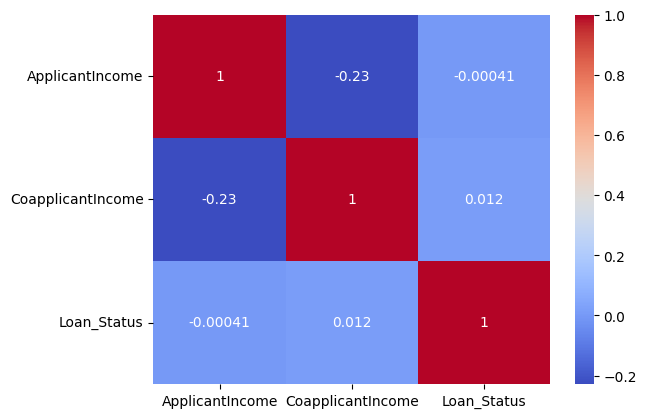

In [389]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()